In [11]:
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [12]:
curr_path = os.getcwd()
input_path = os.path.join(curr_path, 'data_1107.xlsx')
df = pd.read_excel(input_path, index_col=0)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [14]:
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, if_target=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    df_without_target = df.loc[:, df.columns[1:]]
    cols, names = list(), list()
    if if_target:
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        agg = concat(cols, axis=1)
        agg.columns = names
    else:
        for i in range(n_in, 0, -1):
            cols.append(df_without_target.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(1, n_vars)]
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        agg = concat(cols, axis=1)
        agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [15]:
n=48
df_lagged = series_to_supervised(df, n_in=1, n_out=n, dropnan=True, if_target=True)

In [16]:
for i in range(n):
    df_lagged.drop(df_lagged.columns[range(df_lagged.shape[1]-12-i,df_lagged.shape[1]-i)], axis=1, inplace=True)

In [17]:
list(df_lagged.columns)

['var1(t-1)',
 'var2(t-1)',
 'var3(t-1)',
 'var4(t-1)',
 'var5(t-1)',
 'var6(t-1)',
 'var7(t-1)',
 'var8(t-1)',
 'var9(t-1)',
 'var10(t-1)',
 'var11(t-1)',
 'var12(t-1)',
 'var13(t-1)',
 'var1(t)',
 'var1(t+1)',
 'var1(t+2)',
 'var1(t+3)',
 'var1(t+4)',
 'var1(t+5)',
 'var1(t+6)',
 'var1(t+7)',
 'var1(t+8)',
 'var1(t+9)',
 'var1(t+10)',
 'var1(t+11)',
 'var1(t+12)',
 'var1(t+13)',
 'var1(t+14)',
 'var1(t+15)',
 'var1(t+16)',
 'var1(t+17)',
 'var1(t+18)',
 'var1(t+19)',
 'var1(t+20)',
 'var1(t+21)',
 'var1(t+22)',
 'var1(t+23)',
 'var1(t+24)',
 'var1(t+25)',
 'var1(t+26)',
 'var1(t+27)',
 'var1(t+28)',
 'var1(t+29)',
 'var1(t+30)',
 'var1(t+31)',
 'var1(t+32)',
 'var1(t+33)',
 'var1(t+34)',
 'var1(t+35)',
 'var1(t+36)',
 'var1(t+37)',
 'var1(t+38)',
 'var1(t+39)',
 'var1(t+40)',
 'var1(t+41)',
 'var1(t+42)',
 'var1(t+43)',
 'var1(t+44)',
 'var1(t+45)',
 'var1(t+46)',
 'var1(t+47)']

In [18]:
import matplotlib.pylab as plt
import seaborn as sns

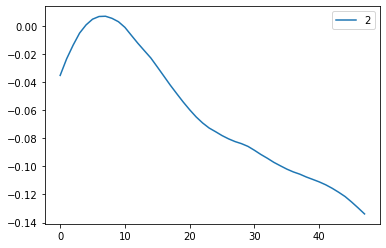

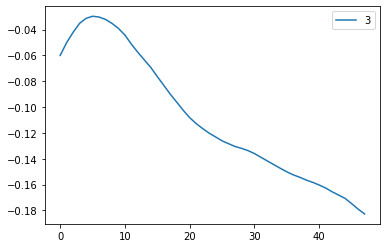

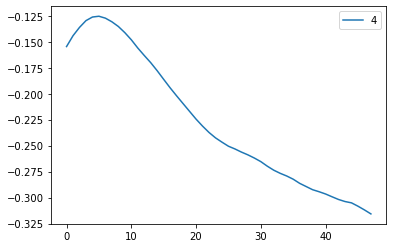

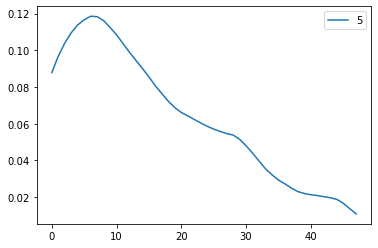

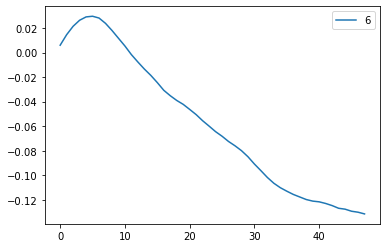

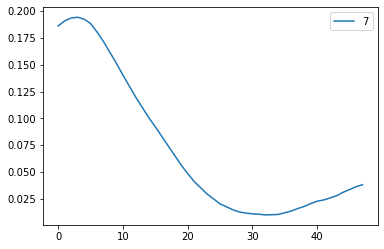

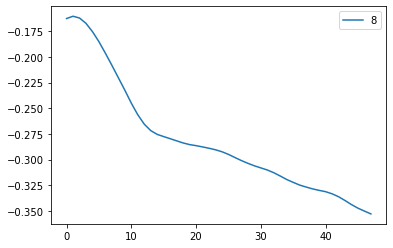

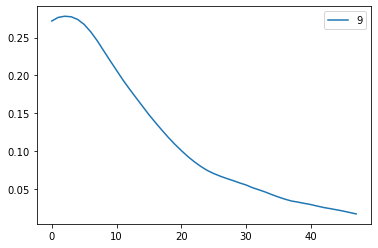

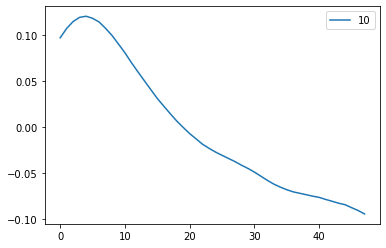

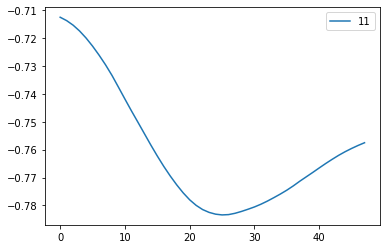

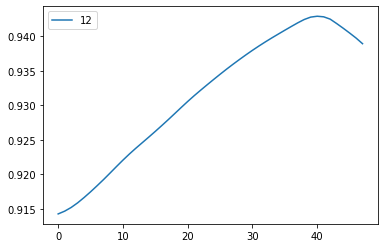

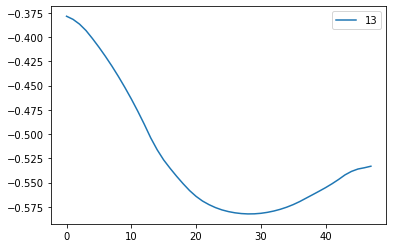

In [26]:
#calculate best lag:
best_lag = {}
for i in range(2,14):
    corr_lst = df_lagged.corr(method='pearson')['var'+ str(i) + '(t-1)'].iloc[13:]
    corr_lst_abs = [abs(j) for j in corr_lst]
    plt.figure(figsize = (6,4))
    plt.plot(range(n),corr_lst,label = str(i))
    plt.legend()
    plt.show()
    if i in range(2,11):
        lag = np.argmax(corr_lst) + 1
    else:
        lag = np.argmax(corr_lst_abs) + 1
    best_lag['var'+ str(i)] = lag

In [27]:
best_lag

{'var2': 8,
 'var3': 6,
 'var4': 6,
 'var5': 7,
 'var6': 6,
 'var7': 4,
 'var8': 2,
 'var9': 3,
 'var10': 5,
 'var11': 26,
 'var12': 41,
 'var13': 29}